In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator as op
from functools import reduce

In [2]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

In [3]:
n_max = 41
n=np.arange(1,n_max).astype(np.int64)
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

----------------------------------------------------------------------------------------------------------------------------------------------------------------
##C-LINK: 
$$\mathcal{O}(n^3)$$

In [4]:
clink = 3*np.log2(n)
clink

array([ 0.        ,  3.        ,  4.7548875 ,  6.        ,  6.96578428,
        7.7548875 ,  8.42206477,  9.        ,  9.509775  ,  9.96578428,
       10.37829486, 10.7548875 , 11.10131915, 11.42206477, 11.72067179,
       12.        , 12.26238852, 12.509775  , 12.74378254, 12.96578428,
       13.17695227, 13.37829486, 13.57068587, 13.7548875 , 13.93156857,
       14.10131915, 14.26466251, 14.42206477, 14.57394299, 14.72067179,
       14.86258893, 15.        , 15.13318236, 15.26238852, 15.38784905,
       15.509775  , 15.6283601 , 15.74378254, 15.85620666, 15.96578428])

##BOSS/ IDP:  
$$\sum_{s=1}^n \binom{n}{s} 2^{s-1} \rightarrow \mathcal{O}(3^n)$$

In [5]:
boss_idp = n*np.log2(3)
boss_idp

array([ 1.5849625 ,  3.169925  ,  4.7548875 ,  6.33985   ,  7.9248125 ,
        9.509775  , 11.09473751, 12.67970001, 14.26466251, 15.84962501,
       17.43458751, 19.01955001, 20.60451251, 22.18947501, 23.77443751,
       25.35940001, 26.94436251, 28.52932501, 30.11428751, 31.69925001,
       33.28421252, 34.86917502, 36.45413752, 38.03910002, 39.62406252,
       41.20902502, 42.79398752, 44.37895002, 45.96391252, 47.54887502,
       49.13383752, 50.71880002, 52.30376252, 53.88872502, 55.47368753,
       57.05865003, 58.64361253, 60.22857503, 61.81353753, 63.39850003])

##CFSS/ IP:  
$$\mathcal{O}(n^n)$$

In [6]:
ip_cfss = n*np.log2(n)
ip_cfss

array([  0.        ,   2.        ,   4.7548875 ,   8.        ,
        11.60964047,  15.509775  ,  19.65148445,  24.        ,
        28.52932501,  33.21928095,  38.05374781,  43.01955001,
        48.10571634,  53.30296891,  58.60335893,  64.        ,
        69.4868683 ,  75.05865003,  80.71062276,  86.4385619 ,
        92.23866588,  98.10749561, 104.04192499, 110.03910002,
       116.09640474, 122.21143267, 128.38196256, 134.60593782,
       140.88144886, 147.20671787, 153.58008562, 160.        ,
       166.46500594, 172.9737366 , 179.52490559, 186.11730005,
       192.74977453, 199.42124551, 206.13068654, 212.8771238 ])

##BILP-Q: 
$$\mathcal{O}((2^n-1)+p*(3*(2^n-1)+2*(2^n)-1))$$

In [7]:
p_min = 1

In [8]:
bilpq = np.log2((2**(n) - 1) + p_min * (3 * (2**n - 1) + 2*(2**(n) - 1)))
bilpq

array([ 2.5849625 ,  4.169925  ,  5.39231742,  6.4918531 ,  7.53915881,
        8.56224242,  9.57364719, 10.57931594, 11.58214198, 12.58355293,
       13.58425789, 14.58461024, 15.58478638, 16.58487444, 17.58491847,
       18.58494049, 19.58495149, 20.584957  , 21.58495975, 22.58496112,
       23.58496181, 24.58496216, 25.58496233, 26.58496241, 27.58496246,
       28.58496248, 29.58496249, 30.5849625 , 31.5849625 , 32.5849625 ,
       33.5849625 , 34.5849625 , 35.5849625 , 36.5849625 , 37.5849625 ,
       38.5849625 , 39.5849625 , 40.5849625 , 41.5849625 , 42.5849625 ])

##CSG over graphs (by Voice et. al):  
$$\mathcal{O}((n^2)*\binom{(n^2)}{n}$$

In [9]:
csg_over_graphs_voice = []
for n_i in n:
  try:
    csg_over_graphs_voice.append(np.log2((n_i**2)*(ncr(n_i**2,n_i))))
  except:
    csg_over_graphs_voice.append(np.nan)
    continue
csg_over_graphs_voice = np.array(csg_over_graphs_voice)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


In [10]:
csg_over_graphs_voice

array([ 0.        ,  4.5849625 ,  9.56224242, 14.82972274, 20.34109528,
       26.06333319, 31.97087445, 38.04341021, 44.26448872, 50.62055294,
       57.10026068,         nan, 60.1486507 ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

##GCS-Q: 
$$\mathcal{O}(n^2)$$

In [11]:
gcs_q = 2*np.log2(n)
gcs_q

array([ 0.        ,  2.        ,  3.169925  ,  4.        ,  4.64385619,
        5.169925  ,  5.61470984,  6.        ,  6.33985   ,  6.64385619,
        6.91886324,  7.169925  ,  7.40087944,  7.61470984,  7.81378119,
        8.        ,  8.17492568,  8.33985   ,  8.49585503,  8.64385619,
        8.78463485,  8.91886324,  9.04712391,  9.169925  ,  9.28771238,
        9.40087944,  9.509775  ,  9.61470984,  9.71596199,  9.81378119,
        9.90839262, 10.        , 10.08878824, 10.17492568, 10.25856603,
       10.33985   , 10.41890673, 10.49585503, 10.57080444, 10.64385619])

##Plot the complexities

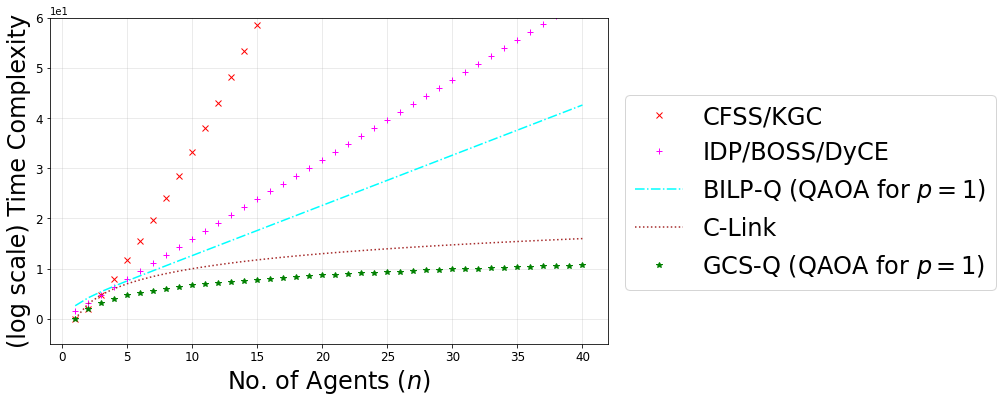

In [23]:
#plt.tight_layout()
font=24
plt.figure(figsize=(10,6))

plt.plot(n, ip_cfss, label = 'CFSS/KGC', color='red', linestyle = 'None', marker = 'x')
plt.plot(n, boss_idp, label = 'IDP/BOSS/DyCE', color='magenta', linestyle = 'None', marker = '+')
plt.plot(n, bilpq, label = 'BILP-Q (QAOA for $p=1$)', color='cyan', linestyle = 'dashdot', marker = 'None')
plt.plot(n, clink, label = 'C-Link', color='brown', linestyle = 'dotted', marker = 'None')
plt.plot(n, gcs_q, label = 'GCS-Q', color='green', linestyle = 'None', marker = '*')


plt.xlabel(r'No. of Agents $(n)$' ,fontdict={'fontsize':font})
plt.ylabel(r'(log scale) Time Complexity', fontdict={'fontsize':font})
plt.ylim(-5, 50)
plt.grid(alpha=0.3)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.legend(fontsize=font, bbox_to_anchor=(1.01,.8), ncol =1)
plt.xticks(np.arange(0, n_max, 5), fontsize=font)
plt.yticks([0, 10, 20, 30, 40, 50, 60],fontsize =font)
plt.tick_params(labelsize=12)
plt.savefig('theoretical_complexities.png', bbox_inches='tight', dpi =400)
plt.show()